# 15.02.20

**Author:** Miron Rogovets

---

### Task 1. Open Worldbank_data.dta file.

Do the cluster analysis using hierarchical clustering algorithm. Select not less than 4 interval variables for the analysis. Don’t forget to standardize the values of variables if needed.

1. Define the number of clusters. Explain your decision.
2. Create a dendrogram.
3. Describe the clusters using descriptive statistics.
4. Try to name the obtained clusters.
5. Save cluster membership variable in the file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df = pd.read_stata('data/Worldbank_data.dta')
df.head()

,year,groups,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,2015.0,3.0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,NaN,61.577619
1,2015.0,2.0,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,15123662.0,106.380207
2,2015.0,2.0,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2449466.0,113.031094
3,2015.0,3.0,American Samoa,ASM,NaN,72.022759,NaN,NaN,18.005690,NaN,NaN
4,2015.0,1.0,Andorra,ADO,96.910000,1631.830630,NaN,NaN,47.992588,NaN,88.123533


In [3]:
print('Dimension of dataset: {}'.format(df.shape))
df.dtypes

Dimension of dataset: (217, 11)


year            float64
groups          float64
country_name     object
country_code     object
internet        float64
secure          float64
export          float64
import          float64
telephone       float64
hightech        float64
mobile          float64
dtype: object

In [4]:
df.groups.unique()

array([3., 2., 1.])

In [5]:
df.isna().sum()

year             0
groups           0
country_name     0
country_code     0
internet        15
secure          10
export          73
import          94
telephone        8
hightech        82
mobile          13
dtype: int64

In [6]:
df.describe()

,year,groups,internet,secure,export,import,telephone,hightech,mobile
count,217.0,217.000000,202.000000,207.000000,144.000000,123.000000,209.000000,1.350000e+02,204.000000
mean,2015.0,2.110599,48.573173,462.902665,35.117770,37.832033,18.336921,1.490164e+10,107.722941
std,0.0,0.808936,29.032396,1140.454338,21.362562,16.288464,18.339808,5.546809e+10,42.329588
min,2015.0,1.000000,1.083733,0.039753,1.661690,4.637094,0.000000,0.000000e+00,7.049953
25%,2015.0,1.000000,21.000000,5.499596,17.865648,25.473076,2.977923,7.652986e+06,80.555543
50%,2015.0,2.000000,50.219659,51.873000,31.909565,37.910044,13.395103,1.101963e+08,109.340703
75%,2015.0,3.000000,73.129675,326.749504,49.747775,48.733326,29.921121,3.190229e+09,130.444475
max,2015.0,3.000000,98.323610,10231.541925,86.376427,84.684010,128.092380,5.542729e+11,324.440813


Our dataset is pretty small, so we should fill <code>nan</code> values. We will use <code>mean</code> values to fill <code>nan</code>

In [7]:
df.fillna(df.mean(), inplace=True)
print(df.isna().sum())
df.head()

year            0
groups          0
country_name    0
country_code    0
internet        0
secure          0
export          0
import          0
telephone       0
hightech        0
mobile          0
dtype: int64


,year,groups,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,2015.0,3.0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,1.490164e+10,61.577619
1,2015.0,2.0,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207
2,2015.0,2.0,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094
3,2015.0,3.0,American Samoa,ASM,48.573173,72.022759,35.117770,37.832033,18.005690,1.490164e+10,107.722941
4,2015.0,1.0,Andorra,ADO,96.910000,1631.830630,35.117770,37.832033,47.992588,1.490164e+10,88.123533


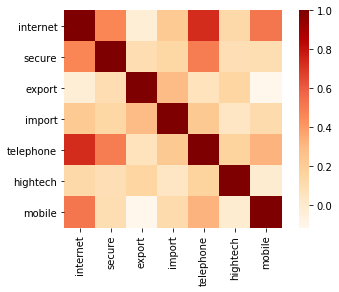

In [8]:
data = df[['internet', 'secure', 'export', 'import', 'telephone', 'hightech', 'mobile']]
cor = data.corr()
sns.heatmap(data.corr(), square = True, cmap='OrRd')

We aslo should scale the data before proceeding, since the clustering is sensitive to range of data.

In [9]:
ss = StandardScaler()
scaled = ss.fit_transform(data)
scaled

array([[-1.44276617, -0.41531649,  2.16443827, ..., -1.00210416,
         0.        , -1.1271079 ],
       [ 0.52537319, -0.38263669, -0.56595408, ..., -0.62628811,
        -0.3415289 , -0.03279654],
       [-0.37124498, -0.41429775,  1.39196645, ..., -0.57337943,
        -0.34181967,  0.1296526 ],
       ...,
       [-0.84009762, -0.41601905,  1.23080611, ..., -0.76060894,
        -0.34180826, -0.97070481],
       [-0.98681493, -0.41270338, -1.53202292, ..., -0.97955794,
        -0.34103841, -0.81216573],
       [-1.15287567, -0.4106483 , -0.19869951, ..., -0.89772443,
        -0.34164478, -0.56017047]])

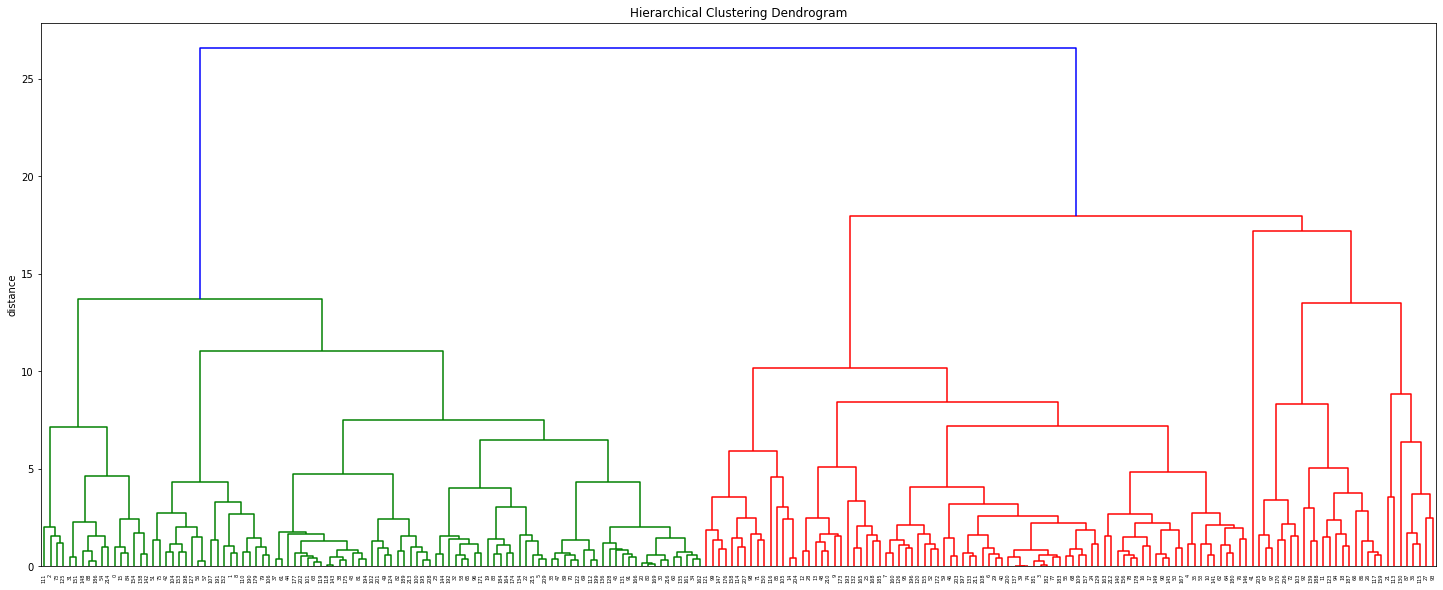

In [10]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(scaled, method='ward'))
plt.ylabel('distance')
plt.show()

In [11]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
predicted = hc.fit_predict(scaled)

In [12]:
hierarchial = pd.DataFrame(predicted)
data.insert((data.shape[1]),'hierarchial',hierarchial)
data.head()

,internet,secure,export,import,telephone,hightech,mobile,hierarchial
0,8.260000,1.414229,72.652794,9.053154,0.343677,1.490164e+10,61.577619,1
1,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207,1
2,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094,1
3,48.573173,72.022759,35.117770,37.832033,18.005690,1.490164e+10,107.722941,2
4,96.910000,1631.830630,35.117770,37.832033,47.992588,1.490164e+10,88.123533,2


In [13]:
for p in data.hierarchial.unique():
    print('Num_clust={}'.format(p))
    print(data[data.hierarchial == p].describe())
    print('====================================')

Num_clust=1
         internet      secure      export      import   telephone  \
count  103.000000  103.000000  103.000000  103.000000  103.000000   
mean    25.565106   53.255241   34.131114   33.645366    5.922029   
std     17.137012  130.777282   19.883735   11.260278    7.250118   
min      1.083733    0.039753    1.661690    4.637094    0.000000   
25%     12.060099    1.979996   20.589396   27.979006    0.859650   
50%     21.320000    5.525073   35.117770   37.832033    2.977923   
75%     40.250000   29.272596   35.117770   37.832033    8.749972   
max     71.715900  677.078864   86.376427   73.088709   46.532156   

           hightech      mobile  hierarchial  
count  1.030000e+02  103.000000        103.0  
mean   8.313556e+09   83.131255          1.0  
std    8.819453e+09   32.386939          0.0  
min    0.000000e+00    7.049953          1.0  
25%    1.037042e+07   63.697434          1.0  
50%    1.490164e+10   81.093582          1.0  
75%    1.490164e+10  107.722941      

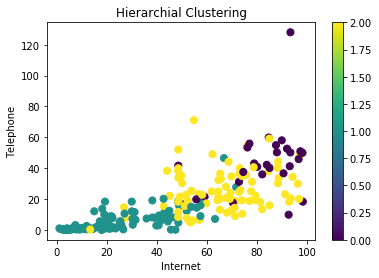

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['internet'], data['telephone'],c=hierarchial[0],s=50)
ax.set_title('Hierarchial Clustering')
ax.set_xlabel('Internet')
ax.set_ylabel('Telephone')
plt.colorbar(scatter)

### Task 2. Open video_games_sales file.

Do the cluster analysis using k-means algorithm. Select not less than 4 interval variables for the analysis. Don’t forget to standardize the values of variables if needed.

1. Define the number of clusters. Explain your decision.
2. Describe the clusters using descriptive statistics.
3. Try to name the obtained clusters.
4. Save cluster membership variable in the file.

In [15]:
df = pd.read_csv('data/video_games_sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print('Dimension of dataset: {}'.format(df.shape))
df.dtypes

Dimension of dataset: (16719, 16)


Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [17]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [18]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [19]:
df.dropna(inplace=True)

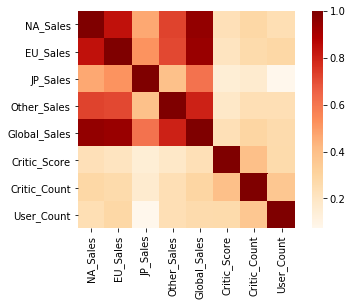

In [20]:
data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']]
cor = data.corr()
sns.heatmap(data.corr(), square = True, cmap='OrRd')

In [21]:
data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [22]:
ss = StandardScaler()
scaled = ss.fit_transform(data)
scaled

array([[42.34974137, 41.79363059, 12.88771102, 31.00717562, 41.6403271 ],
       [15.80201412, 18.22243848, 12.95726451, 11.88552527, 17.69593487],
       [15.72964882, 15.55976677, 11.18365057, 10.62557157, 16.29523122],
       ...,
       [-0.40781312, -0.32896273, -0.22312148, -0.30637969, -0.39096937],
       [-0.39747522, -0.34351284, -0.22312148, -0.30637969, -0.39096937],
       [-0.40781312, -0.32896273, -0.22312148, -0.30637969, -0.39096937]])

In [23]:
kmeans = KMeans(n_clusters=3)

In [24]:
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.cluster_centers_

array([[ 2.18652213,  2.29745373,  1.60053425,  1.96647797,  2.38592877],
       [12.17685718, 12.3480706 , 10.77560344, 13.39005823, 13.74068732],
       [-0.12988613, -0.13544637, -0.09936928, -0.12243641, -0.14277651]])

In [26]:
y = kmeans.fit_predict(scaled)

In [27]:
data['kmeans'] = y
data.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,kmeans
0,41.36,28.96,3.77,8.45,82.53,2
2,15.68,12.76,3.79,3.29,35.52,2
3,15.61,10.93,3.28,2.95,32.77,2
6,11.28,9.14,6.50,2.88,29.80,2
7,13.96,9.18,2.93,2.84,28.92,2


In [28]:
for k in data.kmeans.unique():
    print('K={}'.format(k))
    print(data[data.kmeans == k].describe())
    print('================================')

K=2
        NA_Sales   EU_Sales   JP_Sales  Other_Sales  Global_Sales  kmeans
count  15.000000  15.000000  15.000000    15.000000     15.000000    15.0
mean   12.173333   8.722667   3.162667     3.696000     27.754667     2.0
std     9.139770   6.589985   1.825324     2.819364     16.419336     0.0
min     3.010000   0.010000   0.240000     1.180000     11.660000     2.0
25%     7.970000   6.145000   1.815000     1.970000     20.925000     2.0
50%     9.710000   8.490000   3.600000     2.840000     22.700000     2.0
75%    14.720000   9.190000   4.145000     3.625000     29.360000     2.0
max    41.360000  28.960000   6.500000    10.570000     82.530000     2.0
K=0
         NA_Sales    EU_Sales    JP_Sales  Other_Sales  Global_Sales  kmeans
count  303.000000  303.000000  303.000000   303.000000    303.000000   303.0
mean     2.509538    1.815083    0.524389     0.613333      5.461881     0.0
std      1.701621    1.188990    0.844732     0.444749      2.729743     0.0
min      0.050000 